In [1]:
import sys
from pathlib import Path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
from calculator_core import *
from calculator_core.ATP_DEC import *

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [3]:
origin = "SIN"
destination = "ZRH"
seat_class = "First"
certification = "Legend"
aircraft_code = "B773"
aircraft_age = 1
plf = 0.85
cargo = 0
seat_data = pd.DataFrame(data={
    "First": [4, 81, 35],
    "Business": [48, 55, 28],
    "Premium Economy": [28, 38, 19.5],
    "Economy": [184, 32, 19]
}, index=["Number", "Pitch (cm)", "Width (cm)"]) # 


In [4]:
cfc = CarbonEmissionsCalc(origin, destination, seat_class, certification, aircraft_code, aircraft_age, seat_data, plf, cargo, 1.031493135, 1, 1.031493135, 1.164706594) # Rolling 7 day HAFS from week in December 2019
res = cfc.legend_breakdown(carry_on=1, checked=1, HAF=True, luggage_cert_method="Legend", dataframe=False)

In [5]:
cfc.get_distance() * 1.0315 # Eq S19

10633.38941125686

In [6]:
cfc.well_to_tank() # Eq S20

42136.424937068834

In [7]:
sum(np.prod(seat_data[x]) for x in seat_data) # Total seat area used in Eq S32

217880.0

In [8]:
cfc.non_kyoto_multipliers(HAF=True) # Eqs 33, 34, 35

(1.456336868498707, 1.4243778484784768, 0.20021142377199005)

In [9]:
cfc.legend_breakdown(carry_on=1, checked=1, HAF=True, luggage_cert_method="Legend", dataframe=True) # Table S9, S10, S11

# Difference in values due to rounding error, to make article more comprehendable.
# Ordinarily, ATP-DEC is subject to Python’s default floating-point rounding.

,TTW,WTT,In-Flight Services,Carry On Luggage,Checked Luggage,Airport,Aircraft,NOx,H2O,CiC,Total
First,3288.384551,499.501451,10,305.049257,655.680587,15.359913,1.577226,4773.840610,656.288697,4669.079637,14874.761929
Business,1786.282966,271.334121,7,305.049257,655.680587,15.359913,1.577226,2593.197369,356.502502,2536.290173,8528.274114
Premium Economy,859.503687,130.557522,5,266.479811,606.592201,15.359913,1.577226,1247.765747,171.537892,1220.383778,4524.757776
Economy,705.233794,107.124121,3,266.479811,606.592201,15.359913,1.577226,1023.807792,140.749040,1001.340536,3871.264433


<>:115: SyntaxWarning: invalid escape sequence '\ '
<>:117: SyntaxWarning: invalid escape sequence '\ '
<>:115: SyntaxWarning: invalid escape sequence '\ '
<>:117: SyntaxWarning: invalid escape sequence '\ '
C:\Users\finnm\AppData\Local\Temp\ipykernel_25328\3713729162.py:115: SyntaxWarning: invalid escape sequence '\ '
  legend_normal = ax.legend(handles=handles_normal, labels=labels_normal, title="$\\bf{Existing\ Calculators}$", loc='upper right', fontsize='large', title_fontsize='large', )
C:\Users\finnm\AppData\Local\Temp\ipykernel_25328\3713729162.py:117: SyntaxWarning: invalid escape sequence '\ '
  legend_special = ax.legend(handles=handles_special, labels=labels_special, title="$\\bf{ATP-DEC\ Factors}$", loc='center right', bbox_to_anchor=(1, 0.55), fontsize='large', title_fontsize='large')
C:\Users\finnm\AppData\Local\Temp\ipykernel_25328\3713729162.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tig

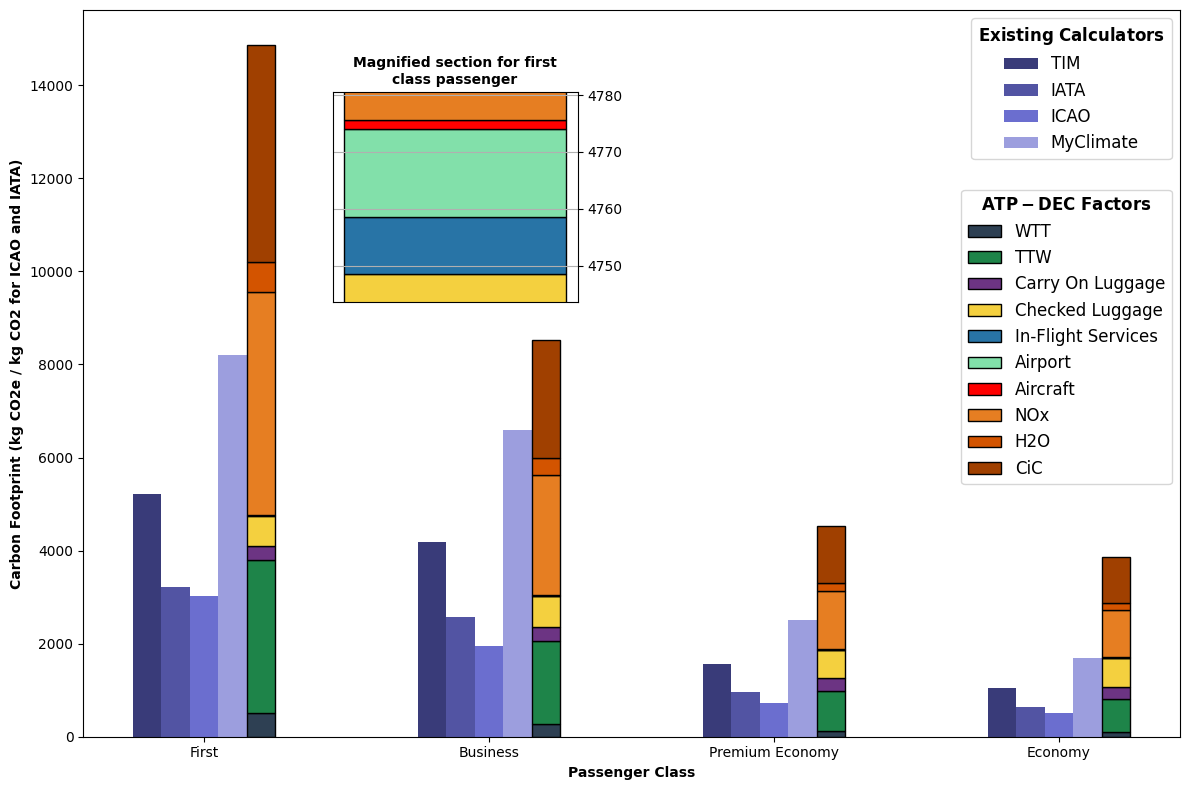

In [10]:
# Data for existing calculators,  (accessed 11/12/24)
data_normal = {
    "TIM": [1044 * 5, 
            1044 * 4, 
            1044 * 1.5, 
            1044
            ],
    "IATA": [645 * 5, 
             645  * 4, 
             645  * 1.5, 
             645 
             ],
    "ICAO": [3014, 
             1953, 
             735, 
             505
             ],
    "MyClimate": [8200, 
                  6600, 
                  2500, 
                  1700
                  ],
}

# Data for ATP-DEC (breakdown)
special_data_dict = res
categories = [
    "WTT",
    "TTW",
    "Carry On Luggage",
    "Checked Luggage",
    "In-Flight Services",
    "Airport",
    "Aircraft",
    "NOx",
    "H2O",
    "CiC",
]#list(special_data_dict.keys())[:-1]  # Exclude "Total"
special_data = {
    "First": [special_data_dict[cat][0] for cat in categories],
    "Business": [special_data_dict[cat][1] for cat in categories],
    "Premium Economy": [special_data_dict[cat][2] for cat in categories],
    "Economy": [special_data_dict[cat][3] for cat in categories],
}

bar_width = 0.1
indices = np.arange(4)

fig, ax = plt.subplots(figsize=(12, 8))

# Colormap for existing calculators
normal_colors = plt.cm.tab20b.colors

# Plot existing calculators
handles_normal = []
labels_normal = list(data_normal.keys())
for i, (calculator, values) in enumerate(data_normal.items()):
    bar = ax.bar(indices + i * bar_width, 
                 values, 
                 bar_width, 
                 label=calculator, 
                 color=normal_colors[i])
    handles_normal.append(bar[0])

# Colormap for ATP-DEC (stacked)
special_colors = [
        '#2E4053',  # WTT - Dark Blue
        '#1E8449',  # TTW - Dark Green
        '#6C3483',  # Carry On Luggage - Deep Purple
        '#F4D03F',  # Checked Luggage - Golden Yellow
        '#2874A6',  # In-Flight Services - Moderate Blue
        '#82E0AA',  # Airport - Bright Green
        '#FF0000',  # Aircraft - Red
        '#E67E22',  # NOx - Dark Orange
        '#D35400',  # CiC - Dark Reddy Orange
        '#A04000',  # H2O - Reddy Brown
    ]

# Stacked totals for the ATP-DEC
stacked_totals = np.zeros(4)

handles_special = []
labels_special = categories
for i, (category, values) in enumerate(zip(categories, zip(*special_data.values()))):
    bar = ax.bar(indices + len(data_normal) * bar_width, values, bar_width, 
           bottom=stacked_totals, 
           label=category, 
           color=special_colors[i], 
           edgecolor='black' )
    handles_special.append(bar[0])
    stacked_totals += np.array(values)

magni_dat = list(special_data.values())[0][0:8] # WTT to NOx, to include all small ones and pre small and one after small
small_categories = ["Checked Luggage", "In-Flight Services", "Airport", "Aircraft", "NOx"]
small_values = magni_dat[3:] # one either side of small trio (len 5)
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper center", bbox_to_anchor=(110, 110, 700, 600))
stacked_inset = sum(magni_dat[:3])
for i, (category, value) in enumerate(zip(small_categories, small_values)):
    ax_inset.bar(1, value, bar_width, bottom=stacked_inset, color=special_colors[i+3], edgecolor='black', label=category)
    stacked_inset += value
orig_stacked_inset = sum(magni_dat[:4])
ax_inset.set_ylim(orig_stacked_inset - 5, orig_stacked_inset + sum(small_values[1:4]) + 5)
ax_inset.set_xticks([])
ax_inset.yaxis.tick_right()
ax_inset.set_title("Magnified section for first\nclass passenger", fontsize=10, fontweight='bold')

# X-axis labels and legend
ax.set_xticks(indices + (len(data_normal) * bar_width) / 2)
ax.set_xticklabels(["First", "Business", "Premium Economy", "Economy"])
ax.set_ylabel("Carbon Footprint (kg CO2e / kg CO2 for ICAO and IATA)", fontweight='bold')
ax.set_xlabel("Passenger Class", fontweight='bold')
#ax.set_title("CFC Case Study Comparison", fontweight='bold')

# two separate legends
legend_normal = ax.legend(handles=handles_normal, labels=labels_normal, title="$\\bf{Existing\ Calculators}$", loc='upper right', fontsize='large', title_fontsize='large', )
ax.add_artist(legend_normal)  # Add the first legend to the plot
legend_special = ax.legend(handles=handles_special, labels=labels_special, title="$\\bf{ATP-DEC\ Factors}$", loc='center right', bbox_to_anchor=(1, 0.55), fontsize='large', title_fontsize='large')

#plt.ylim([5000, 6000])
ax.set_axisbelow(True)
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()